### Welcome to a very entry level Speech Recognition tutorial!

**I got most of this content from [RealPython](https://realpython.com/python-speech-recognition/), check them out and learn a lot more!**

### What is Speech Recognition? 

>Speech recognition, also known as automatic speech recognition (ASR), computer speech recognition, or speech-to-text, is a capability which enables a program to process human speech into a written format. [from IBM]

### Are Speech Recognition and Voice Recognition the same thing?

Not really!. 

Voice recognition is something you will use with devices like Amazon Alexa or Google Dot. It listens to your voice in real-time and responds. Voice Recognition has limited functionality, usually restricted to the task at hand, but is the process through which most digital assistants operate.

**Speech Recognition on the other hand, uses NLP(Natural Language Processing) to convert audio to text and vice versa, yet The purpose of voice recognition is to identify the person who is speaking.**

Examples: 

`Speech Recognition`: Note Taking/Writing -> An example of speech recognition technology in use is speech-to-text platforms such as Speechmatics or Google’s speech-to-text engine.

`Voice Recognition`: For example, Apple’s voice assistant (Siri) will provide individualized responses, such as giving calendar updates or reminders, only to the user who trained the assistant to recognize their voice.

### Technical Differences:

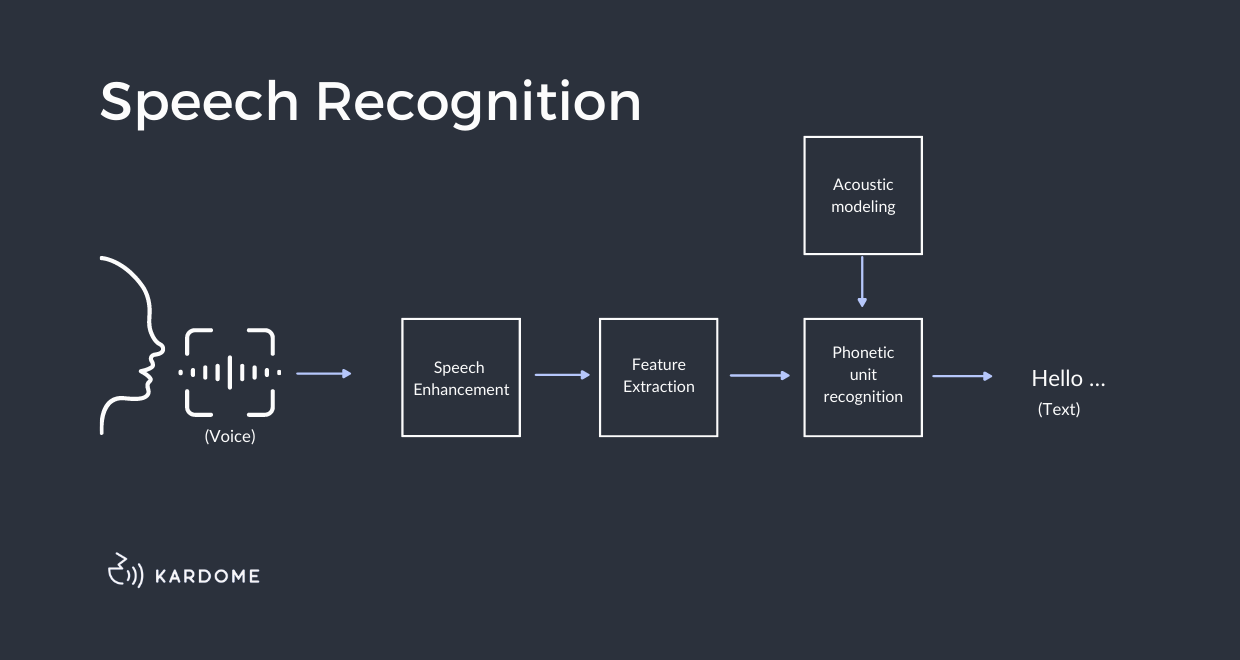

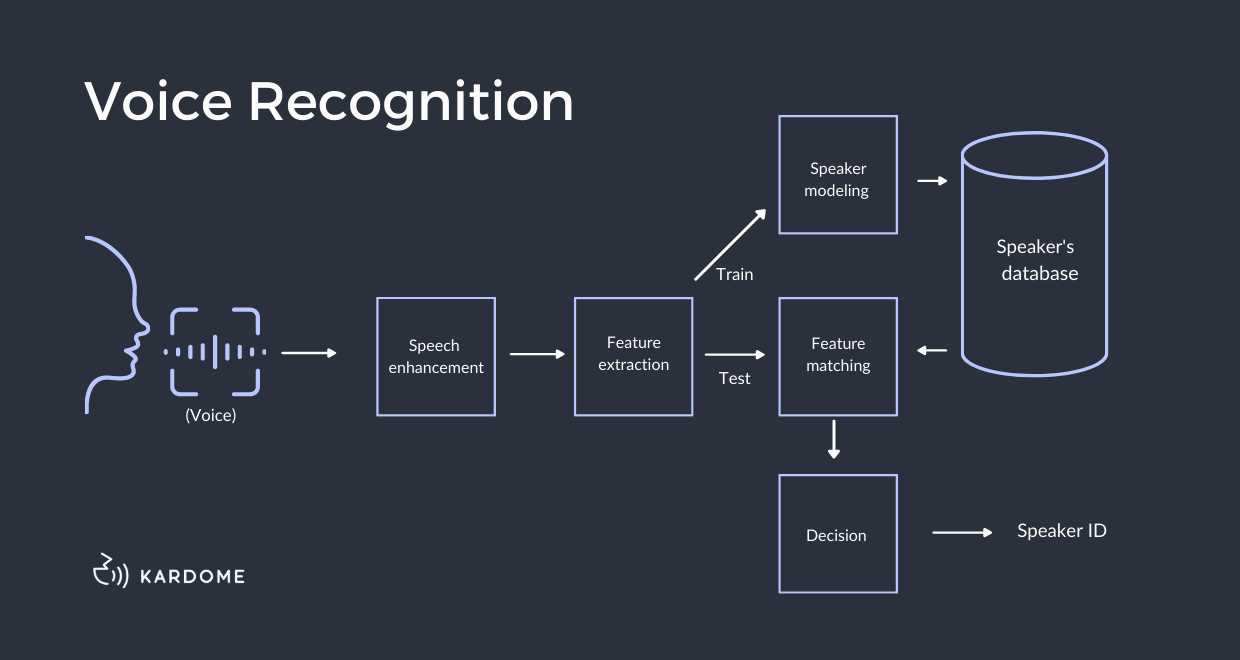

***

### Speech Recognition with Python

There are quite a few packages available that we can use:

- apiai
- assemblyai
- google-cloud-speech
- pocketsphinx
- SpeechRecognition
- watson-developer-cloud
- wit


`apiai` and `wit`are very powerful packages that come with the capability to perform `sentiment analysis`, which is beyond speech recognition. we will discover them later, but for now they are not what we're looking for. 

We will use `SpeechRecognition` for this tutorial.

Recognizing speech requires audio input, and SpeechRecognition makes retrieving this input really easy. Instead of having to build scripts for accessing microphones and processing audio files from scratch, SpeechRecognition will have you up and running in just a few minutes.

In [1]:
!pip3 install SpeechRecognition

In [2]:
import speech_recognition as sr

In [3]:
sr.__version__

'3.8.1'

In [4]:
r = sr.Recognizer()

In [5]:
harvard = sr.AudioFile('harvard.wav')

In [6]:
with harvard as source:
    audio = r.record(source)

In [7]:
type(audio)

speech_recognition.AudioData

In [8]:
r.recognize_google(audio)

'the still smell of old beer lingers it takes heat to bring out the odour a cold dip restores health exist a salt pickle taste fine with him as well past or my favourite exist for food is the hot cross bun'

In [9]:
with harvard as source:
    audio = r.record(source, duration=4)
r.recognize_google(audio)

'the stale smell of old beer lingers'

In [10]:
r.recognize_google(audio,show_all=True )

{'alternative': [{'transcript': 'the stale smell of old beer lingers',
   'confidence': 0.93410623},
  {'transcript': 'the stale smell of old beard lingers'},
  {'transcript': 'the still smell of old beer lingers'},
  {'transcript': 'the stale smell of old beer drinkers'},
  {'transcript': 'the stale smell of old beer Lingus'}],
 'final': True}

#### Now we want to get audio from our device's microphones. For that, we need to install another library.


#### For macOS, first you will need to install PortAudio with Homebrew, and then install PyAudio with pip:

- brew install portaudio
- pip install pyaudio

#### On Windows, you can install PyAudio with pip:

- pip install pyaudio

In [ ]:
!pip install pyaudio

NOTE : In case you get an error on mac or windows, run the following:

In [ ]:
!pip install --global-option='build_ext' --global-option='-I/usr/local/include' --global-option='-L/usr/local/lib' pyaudio


### Testing the module

In [11]:
!python -m speech_recognition

A moment of silence, please...
Set minimum energy threshold to 216.89411248853793
Say something!
Got it! Now to recognize it...
You said hello
Say something!
Got it! Now to recognize it...
You said so what's happening what's happening
Say something!
^C


In [12]:
import speech_recognition as sr

In [13]:
r = sr.Recognizer() #Creating another instance

In [14]:
mic = sr.Microphone()

In [15]:
with mic as source:
    audio = r.listen(source)

In [16]:
r.recognize_google(audio)

'hi this is an audio'

Cool! we got everything working. It was easier that you thought, I bet!

Let's create a small project with the skills we learned.

### Project: Creating a Guesser Game with Audio Input.

In [18]:
import random
import time

import speech_recognition as sr


def recognize_speech_from_mic(recognizer, microphone):
    """Transcribe speech from recorded from `microphone`.

    Returns a dictionary with three keys:
    "success": a boolean indicating whether or not the API request was
               successful
    "error":   `None` if no error occured, otherwise a string containing
               an error message if the API could not be reached or
               speech was unrecognizable
    "transcription": `None` if speech could not be transcribed,
               otherwise a string containing the transcribed text
    """
    # check that recognizer and microphone arguments are appropriate type
    if not isinstance(recognizer, sr.Recognizer):
        raise TypeError("`recognizer` must be `Recognizer` instance")

    if not isinstance(microphone, sr.Microphone):
        raise TypeError("`microphone` must be `Microphone` instance")

    # adjust the recognizer sensitivity to ambient noise and record audio
    # from the microphone
    with microphone as source:
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)

    # set up the response object
    response = {
        "success": True,
        "error": None,
        "transcription": None
    }

    # try recognizing the speech in the recording
    # if a RequestError or UnknownValueError exception is caught,
    #     update the response object accordingly
    try:
        response["transcription"] = recognizer.recognize_google(audio)
    except sr.RequestError:
        # API was unreachable or unresponsive
        response["success"] = False
        response["error"] = "API unavailable"
    except sr.UnknownValueError:
        # speech was unintelligible
        response["error"] = "Unable to recognize speech"

    return response


if __name__ == "__main__":
    # set the list of words, maxnumber of guesses, and prompt limit
    WORDS = ["cat", "dog", "snake", "rainbow", "euphoria", "sky"]
    NUM_GUESSES = 3
    PROMPT_LIMIT = 5

    # create recognizer and mic instances #our code
    recognizer = sr.Recognizer()
    microphone = sr.Microphone()

    # get a random word from the list
    word = random.choice(WORDS)

    # format the instructions string
    instructions = (
        "I'm thinking of one of these words:\n"
        "{words}\n"
        "You have {n} tries to guess which one.\n"
    ).format(words=', '.join(WORDS), n=NUM_GUESSES)

    # show instructions and wait 3 seconds before starting the game
    print(instructions)
    #sleep instruction #our code
    time.sleep(3)

    for i in range(NUM_GUESSES):
        # get the guess from the user
        # if a transcription is returned, break out of the loop and
        #     continue
        # if no transcription returned and API request failed, break
        #     loop and continue
        # if API request succeeded but no transcription was returned,
        #     re-prompt the user to say their guess again. Do this up
        #     to PROMPT_LIMIT times
        for j in range(PROMPT_LIMIT):
            print('Guess {}. Speak!'.format(i+1))
            guess = recognize_speech_from_mic(recognizer, microphone)
            #error handling
            if guess["transcription"]:
                break
            if not guess["success"]:
                break
            print("I didn't catch that. What did you say?\n")

        # if there was an error, stop the game
        #error handling
        if guess["error"]:
            print("ERROR: {}".format(guess["error"]))
            break

        # show the user the transcription 
        
        print("You said: {}".format(guess["transcription"]))

        # determine if guess is correct and if any attempts remain

        guess_is_correct = guess["transcription"].lower() == word.lower()
        user_has_more_attempts = i < NUM_GUESSES - 1
        
        # determine if the user has won the game
        # if not, repeat the loop if user has more attempts
        # if no attempts left, the user loses the game
        if guess_is_correct:
            print("Correct! You win!".format(word))
            break
        elif user_has_more_attempts:
            print("Incorrect. Try again.\n")
        else:
            print("Sorry, you lose!\nI was thinking of '{}'.".format(word))
            break


I'm thinking of one of these words:
cat, dog, snake, rainbow, euphoria, sky
You have 3 tries to guess which one.

Guess 1. Speak!
You said: Sky
Incorrect. Try again.

Guess 2. Speak!
You said: cats
Incorrect. Try again.

Guess 3. Speak!
You said: dog
Sorry, you lose!
I was thinking of 'snake'.
